In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Buisness_data9 = pd.read_csv(r"C:\Users\Hp\Desktop\future_interns\buisnessdata\Year 2009-2010.csv", encoding= 'latin-1')
#df=Buisness_data9

In [3]:
Buisness_data10 = pd.read_csv(r"C:\Users\Hp\Desktop\future_interns\buisnessdata\Year 2010-2011.csv", encoding= 'latin-1')

In [4]:
Buisness_data9.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
Buisness_data10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Standardize column names
Buisness_data9.columns = [c.strip().replace(' ', '_') for c in Buisness_data9.columns]

In [7]:
# Parse dates and numerics
Buisness_data9['InvoiceDate'] = pd.to_datetime(Buisness_data9['InvoiceDate'], errors='coerce', infer_datetime_format=True)
Buisness_data9['Quantity'] = pd.to_numeric(Buisness_data9['Quantity'], errors='coerce')
Buisness_data9['Price'] = pd.to_numeric(Buisness_data9['Price'], errors='coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\2832563132.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Buisness_data9['InvoiceDate'] = pd.to_datetime(Buisness_data9['InvoiceDate'], errors='coerce', infer_datetime_format=True)


In [9]:
# Filter valid rows
Buisness_data9 = Buisness_data9[(Buisness_data9['Quantity'] > 0) & (Buisness_data9['Price'] > 0) & (Buisness_data9['InvoiceDate'].notna())]

In [10]:
# Revenue and YearMonth
Buisness_data9['Revenue'] = Buisness_data9['Quantity'] * Buisness_data9['Price']
Buisness_data9['YearMonth'] = Buisness_data9['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

Buisness_data9.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Revenue,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [11]:
# Monthly sales trend
monthly = Buisness_data9.groupby('YearMonth', as_index=False)['Revenue'].sum().sort_values('YearMonth')

In [12]:
# Categorywise performance via simple keyword categorization

def categorize(desc):
    d = str(desc).lower()
    if 'christmas' in d or 'xmas' in d or 'tree' in d:
        return 'Christmas / Seasonal'
    if 'light' in d or 'lamp' in d or 'lantern' in d:
        return 'Lighting'
    if 'mug' in d or 'cup' in d:
        return 'Kitchenware'
    if 'bag' in d or 'purse' in d or 'wallet' in d:
        return 'Bags & Accessories'
    if 'box' in d or 'storage' in d or 'basket' in d:
        return 'Storage & Boxes'
    if 'frame' in d or 'photo' in d:
        return 'Frames & Decor'
    if 'vintage' in d or 'retro' in d:
        return 'Vintage Decor'
    if 'toy' in d or 'game' in d:
        return 'Toys & Games'
    if 'candle' in d:
        return 'Candles & Scents'
    if 'bath' in d or 'soap' in d:
        return 'Bath & Body'
    if 'garden' in d or 'planter' in d or 'flower' in d:
        return 'Garden & Outdoor'
    return 'Other'


In [13]:
Buisness_data9['Category'] = Buisness_data9['Description'].apply(categorize)
cat_perf = Buisness_data9.groupby('Category', as_index=False).agg({'Revenue':'sum','Quantity':'sum'}).sort_values('Revenue', ascending=False)
cat_perf.head(10)

,Category,Revenue,Quantity
8,Other,5816578.934,3218871
0,Bags & Accessories,910402.930,598778
11,Vintage Decor,785664.160,345180
7,Lighting,756603.800,435955
9,Storage & Boxes,692744.720,288198
3,Christmas / Seasonal,383049.980,275504
6,Kitchenware,281208.820,288088
5,Garden & Outdoor,238653.120,139202
2,Candles & Scents,189500.670,136692
4,Frames & Decor,161811.240,53999


In [14]:
# Customer behavior: RFM and basic stats
snapshot_date = Buisness_data9['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = Buisness_data9.groupby('Customer_ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']


In [15]:
# Quantile-based score
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_quartile'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['RFMScore'] = rfm['R_quartile'].astype(int) + rfm['F_quartile'].astype(int) + rfm['M_quartile'].astype(int)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMScore
0,12346.0,165,11,372.86,1,4,2,7
1,12347.0,3,2,1323.32,4,2,3,9
2,12348.0,74,1,222.16,2,1,1,4
3,12349.0,43,3,2671.14,3,3,4,10
4,12351.0,11,1,300.93,4,1,1,6


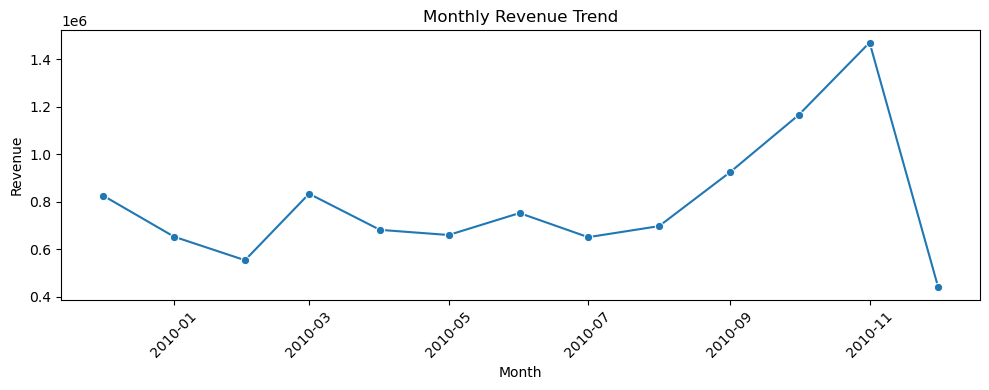

Monthly trend head:
   YearMonth     Revenue
0 2009-12-01  825685.760
1 2010-01-01  652708.502
2 2010-02-01  553713.306
3 2010-03-01  833570.131
4 2010-04-01  681528.992


In [16]:
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='YearMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Monthly trend head:')
print(monthly.head())


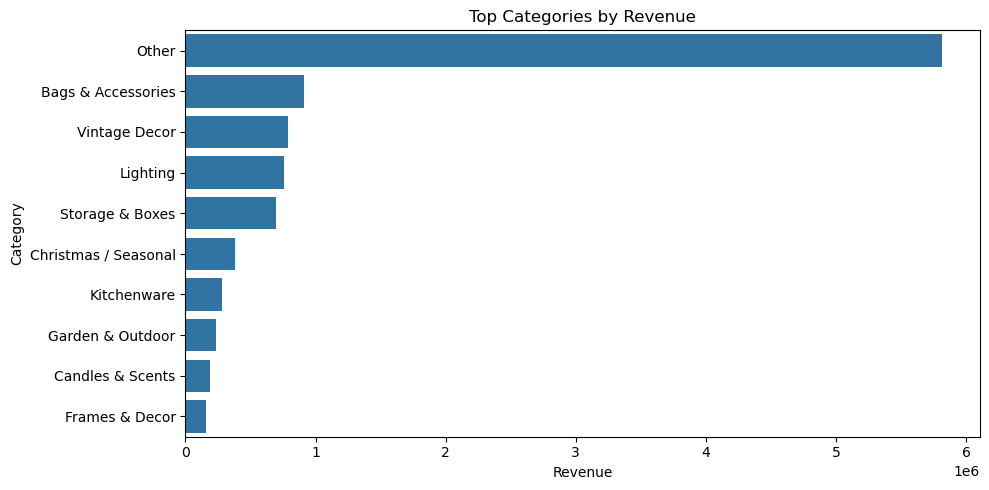

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=cat_perf.head(10), x='Revenue', y='Category')
plt.title('Top Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

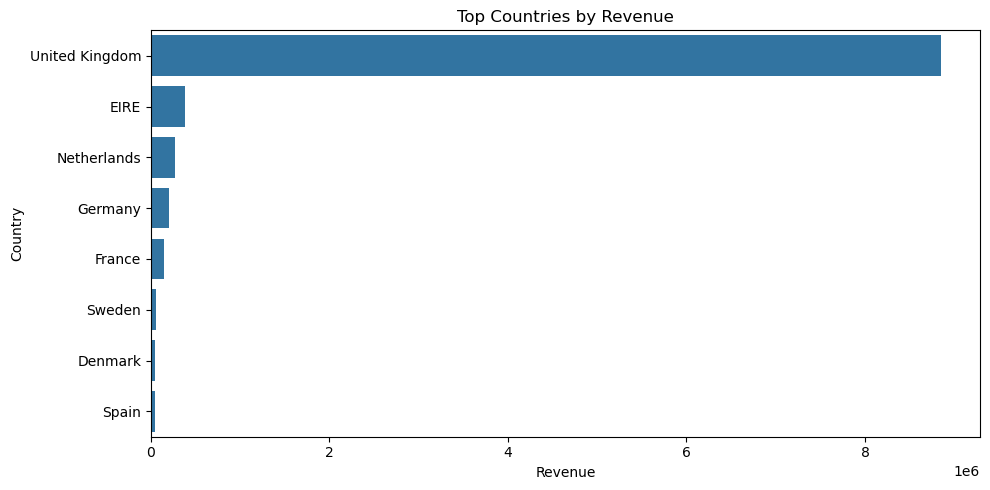

Top countries head:
           Country      Revenue
37  United Kingdom  8846129.263
10            EIRE   380977.820
24     Netherlands   268786.000
13         Germany   202395.321
12          France   147211.490
32          Sweden    53525.390
9          Denmark    50906.850
31           Spain    47601.420


In [18]:
# Countries
country_rev = Buisness_data9.groupby('Country', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=country_rev.head(8), x='Revenue', y='Country')
plt.title('Top Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print('Top countries head:')
print(country_rev.head(8))

For Buisness_data10-11

In [19]:
# Standardize column names
Buisness_data10.columns = [c.strip().replace(' ', '_') for c in Buisness_data10.columns]

In [20]:
# Parse dates and numerics
Buisness_data10['InvoiceDate'] = pd.to_datetime(Buisness_data10['InvoiceDate'], errors='coerce', infer_datetime_format=True)
Buisness_data10['Quantity'] = pd.to_numeric(Buisness_data10['Quantity'], errors='coerce')
Buisness_data10['Price'] = pd.to_numeric(Buisness_data10['Price'], errors='coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\1996394570.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Buisness_data10['InvoiceDate'] = pd.to_datetime(Buisness_data10['InvoiceDate'], errors='coerce', infer_datetime_format=True)


In [21]:
# Filter valid rows
Buisness_data10 = Buisness_data9[(Buisness_data10['Quantity'] > 0) & (Buisness_data10['Price'] > 0) & (Buisness_data10['InvoiceDate'].notna())]

C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\92969986.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Buisness_data10 = Buisness_data9[(Buisness_data10['Quantity'] > 0) & (Buisness_data10['Price'] > 0) & (Buisness_data10['InvoiceDate'].notna())]


In [22]:
# Revenue and YearMonth
Buisness_data10['Revenue'] = Buisness_data10['Quantity'] * Buisness_data10['Price']
Buisness_data10['YearMonth'] = Buisness_data10['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

Buisness_data10.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\3353002472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Buisness_data10['Revenue'] = Buisness_data10['Quantity'] * Buisness_data10['Price']
C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\3353002472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Buisness_data10['YearMonth'] = Buisness_data10['InvoiceDate'].dt.to_period('M').dt.to_timestamp()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Revenue,YearMonth,Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,Christmas / Seasonal
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,Lighting
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,Lighting
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,Frames & Decor
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,Storage & Boxes


In [23]:
# Monthly sales trend
monthly = Buisness_data10.groupby('YearMonth', as_index=False)['Revenue'].sum().sort_values('YearMonth')

In [24]:
# Categorywise performance via simple keyword categorization

def categorize(desc):
    d = str(desc).lower()
    if 'christmas' in d or 'xmas' in d or 'tree' in d:
        return 'Christmas / Seasonal'
    if 'light' in d or 'lamp' in d or 'lantern' in d:
        return 'Lighting'
    if 'mug' in d or 'cup' in d:
        return 'Kitchenware'
    if 'bag' in d or 'purse' in d or 'wallet' in d:
        return 'Bags & Accessories'
    if 'box' in d or 'storage' in d or 'basket' in d:
        return 'Storage & Boxes'
    if 'frame' in d or 'photo' in d:
        return 'Frames & Decor'
    if 'vintage' in d or 'retro' in d:
        return 'Vintage Decor'
    if 'toy' in d or 'game' in d:
        return 'Toys & Games'
    if 'candle' in d:
        return 'Candles & Scents'
    if 'bath' in d or 'soap' in d:
        return 'Bath & Body'
    if 'garden' in d or 'planter' in d or 'flower' in d:
        return 'Garden & Outdoor'
    return 'Other'

In [25]:
Buisness_data10['Category'] = Buisness_data10['Description'].apply(categorize)
cat_perf = Buisness_data10.groupby('Category', as_index=False).agg({'Revenue':'sum','Quantity':'sum'}).sort_values('Revenue', ascending=False)
cat_perf.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\867424150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Buisness_data10['Category'] = Buisness_data10['Description'].apply(categorize)


,Category,Revenue,Quantity
8,Other,5681792.833,3140988
0,Bags & Accessories,889836.230,586591
11,Vintage Decor,767941.900,337423
7,Lighting,741681.360,427267
9,Storage & Boxes,679537.040,282455
3,Christmas / Seasonal,377155.730,270961
6,Kitchenware,275072.520,278942
5,Garden & Outdoor,233464.940,136505
2,Candles & Scents,185416.740,134125
4,Frames & Decor,159543.450,53266


In [26]:
# Customer behavior: RFM and basic stats
snapshot_date = Buisness_data10['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = Buisness_data10.groupby('Customer_ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

In [27]:
# Quantile-based score
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_quartile'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['RFMScore'] = rfm['R_quartile'].astype(int) + rfm['F_quartile'].astype(int) + rfm['M_quartile'].astype(int)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMScore
0,12346.0,165,11,372.86,1,4,2,7
1,12347.0,3,2,1300.82,4,2,3,9
2,12348.0,74,1,222.16,2,1,1,4
3,12349.0,43,2,2393.06,3,2,4,9
4,12351.0,11,1,300.93,4,1,1,6


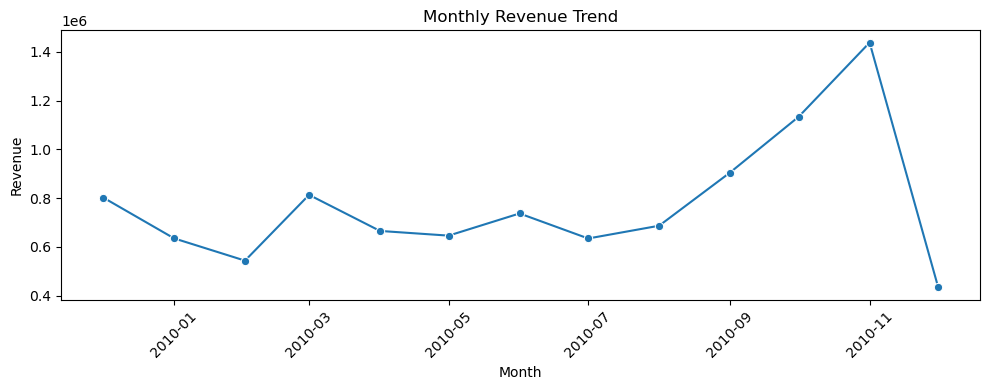

Monthly trend head:
   YearMonth     Revenue
0 2009-12-01  802787.810
1 2010-01-01  635339.822
2 2010-02-01  544038.366
3 2010-03-01  813620.771
4 2010-04-01  665794.612


In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='YearMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Monthly trend head:')
print(monthly.head())

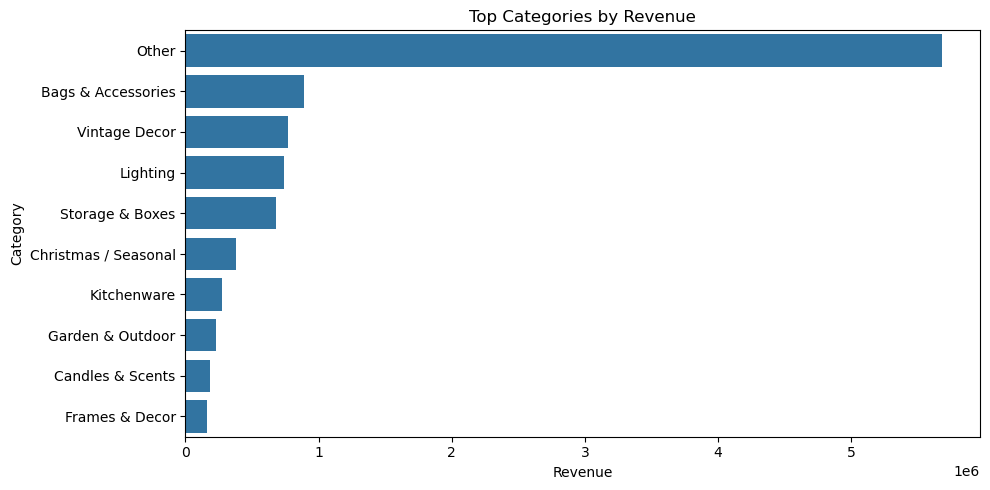

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=cat_perf.head(10), x='Revenue', y='Category')
plt.title('Top Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

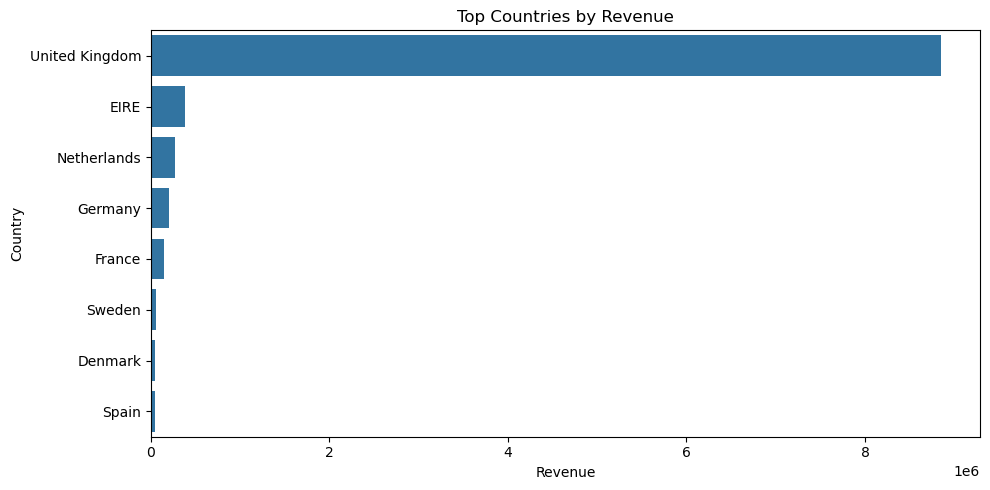

Top countries head:
           Country      Revenue
37  United Kingdom  8846129.263
10            EIRE   380977.820
24     Netherlands   268786.000
13         Germany   202395.321
12          France   147211.490
32          Sweden    53525.390
9          Denmark    50906.850
31           Spain    47601.420


In [30]:
# Countries
country_rev = Buisness_data9.groupby('Country', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=country_rev.head(8), x='Revenue', y='Country')
plt.title('Top Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print('Top countries head:')
print(country_rev.head(8))